<p>
<img src="https://drive.google.com/uc?id=1ZHUKcwzA5c-PKUwoGmBG3TsHk6TmZ-Y0" align="left" width="250">
</p>
<p>
<h1><b><center>Mecánica de Medios Continuos</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 1</center></b><h2>
<h3><b><center>Modelo numérico de un gas</center></b><h3>
<h5><center><b>Asignada</b>: 9 de Febrero de 2024</center><h5>
<h5><center><b>Entrega</b>: 23 de Febrero de 2024</center><h5>
</p>

<hr/>
<b>Nombre</b>: Bryan Camilo Restrepo Arcila
<br/>
<b>Cédula</b>: 1000567825
<br/>
<b>Última actualización</b>: 20/02/2024
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es implementar la teoría básica vista en clase para un gas ideal y simular el comportamiento de del gas, verificando las relaciones que existen entre las propiedades microscópicas y macroscópicas del mismo.

**Procedimiento**:

Para conseguir el objetivo:

1. Definir un sistema apropiado de unidades termodinámicas, tal que $k_B=1$, es decir, después de fijar 3 de las unidades básicas, encuentre la unidad faltante. Explique bien sus elecciones.

2. Generar posiciones al azar para $N$ partículas de un gas dentro de una caja cúbica de lado $L=10$ (en unidades termodinámicas). Comience, para hacer pruebas, con un número pequeño de partícula $N=100$ y vaya aumentando para mejorar los resultados.

3. Escoger una temperatura inicial para el gas $T$ y una masa para las partículas $m_A$. Calcule $v_{mol}$ y $\sigma_v=\sqrt{k_B T/m}$. Genere  los vectores velocidad de las partículas de modo que sus componentes rectangulares sigan la prescripción de Boltzmann, a saber, cada componente se distribuye normalmente, con media 0 y desviación estándar igual a $\sigma_v$ (para todas las componentes).

> **NOTA**: Para generar números distribuídos gausianamente se puede usar la rutina: np.random.normal así: `np.random.normal(loc=0,scale=0.8, size=100)` genera 100 números distribuídos normalmente con media $\mu=0$ y desviación estándar $\sigma=0.8$.

4. Una vez inicializadas las posiciones y las velocidades, calcular *numéricamente* en toda la caja: a) la densidad de número de las partículas, b) la densidad de masa, c) la densidad de energía cinética.

5. Calcular la rapidez de cada partícula y hacer un histograma de las rapideces. Comparar el histograma resultante con la distribución de Maxwell-Boltzmann:

$$
f(v)=\left[\frac{m}{2 \pi k T}\right]^{\frac{3}{2}} 4 \pi v^2 \exp \left(-\frac{m v^2}{2 k T}\right)
$$

6. Definir un paso de tiempo para realizar la simulación del movimiento de las partículas así:

   - Calcular $L_{mol}$ en la caja.

   - El paso de tiempo será $dt = (L_{mol}/v_0)/f_t$ donde $f_t = 10$. Puede hacer más pequeño o más grande $f_t$ de dependiendo de si la simulación tarda mucho tiempo en ejecutarse.

7. Simular el movimiento de las partículas del gas así:

   - Por cada paso de tiempo modificar la posición de las partículas con la velocidad que cada una tenga en un momento dado.

   - Si una partícula se sale por un lado de la caja la partícula debe volver a la caja reflejándose en la pared. Para esto puede simplemente dejar la partícula donde estaba y cambiar el signo de la componente de la velocidad en dirección perpendicular a la superficie de la pared.

   - En cada paso de tiempo, y por cada partícula, determinar cuál de las demás partículas de la caja esta más cerca. Si la distancia a la que se encuentra la otra partícula es menor que $f_d L_{mol}$, donde $f_d=10$ asumiremos que las dos partículas chocan y calcularemos el resultado del choque elástico entre ellas. Puede modificar el parámetro $f_d$ de acuerdo a los resultados.

   - Modifique las velocidades de las partículas cada vez que haya un choque usando la siguiente rutina:

   ```python
   def colision(r1,r2,v1,v2):
      """Calcula las velocidades de dos partículas idénticas
      después de una colisión elástica.
      
      Recibe:
        r1, r2: vectores de posición iniciales (debe ser arrays de numpy).
        v1, v2: vectores de velocidad iniciales (debe ser arrays de numpy).
      Devuelve:
        v1f, v2f: nuevos vectores velocidad de las partículas.

      Adaptado de un código por Alejandro Murillo González.
      """
      r = r1-r2
      n = r/np.linalg.norm(r)

      vrel = v1-v2

      vn = (vrel@n)*n
      v1f = v1-vn
      v2f = v2+vn
      
      return v1f, v2f
   ```

8. Para un momento dado calcule la presión que ejercen las partículas sobre cada una de las parede de la caja. Para ello sume los cambios en los momentos lineales que sufren las partículas al golpear y divida por el passo del tiempo que está usando en la simulación. Compare la presión calculada con la densidad de energía cinética.  También compare la presión obtenida con aquella que se espera a partir de la ecuación de estado de gas ideal.

9. **(Opcional)** Utilizando su modelo puede hacer experimentos interesantes:
  - Expansión libre: Divida la caja en dos con un tabique virtual en la mitad. Inicialice las posiciones y velocidades en solo una mitad de la caja, siguiendo las recomendaciones de este punto. Practique ahora un agujero cuadrado de lado $L/10$ (asegúrese que el agujero no sea más pequeño que $L_{mol}$) en la mitad de la pared. Ahora las partículas chocan contra las paredes y contra el tabique, excepto en el punto del agujero. Corra la simulación permitiendo que las partículas pasen de un lado al otro de la caja hasta que note que toda la caja se ha llenado de partículas. Calcule la densidad y la presión (usando la densidad de energía cinética) al final. Compárela con la que se espera de la teoría de expansión libre de un gas en termodinámica (ver una teoría básica [en este enlace](https://en.wikipedia.org/wiki/Joule_expansion#Ideal_gases)).

  - Proceso adiabático: Simule el movimiento de las partículas mientras va moviendo una de las paredes de la caja hacia adentro. Para ello cada 100 pasos de tiempo desplace la pared hacia adentro 1/10 de $L$.  Repita el proceso hasta que la pared este bien adentro (lo ideal es hasta llegar a $L/2$). Detenga la pared y deje que pasen suficientes pasos de tiempo (otros 100 pasos por ejemplo). Determine la temperatura final del gas (usando la RMS de la rapidez), la densidad y la presión (usando la densidad de energía cinética). Compare su resultado con lo esperado en termodinámica para un proceso de compresión adiabática (ver una teoría básica en [en este enlace](https://en.wikipedia.org/wiki/Adiabatic_process#Ideal_gas_(reversible_process)))

**Resultados esperados**:

- Este notebook con el procedimiento debidamente comentado.

- Gráficos mínimos:
  - Gráfico de la posición inicial de las partículas en 2 dimensiones.
  - Gráfico del histograma de rapideces comparado con la distribución de Maxwell-Boltzmann.

- Datos mínimos:
  - Valores de densidad de número, densidad de masa, densidad de energía cinética, presión calculada numéricamente, presión esperada de acuerdo a la ecuación de estado.

- Gráficos opcionales:
  - Animación del movimiento de las partículas.

- **Importante**: En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

Instalación de librerias

In [70]:
!python3 -m pip install -q plotly celluloid 

Importaciones de las librerias

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from celluloid import Camera
from IPython.display import HTML

Constantes:

In [72]:
k_B = 1.380649e-23 # Constante de Boltzmann [J/K]
R = 8.31446261815324 # Constante de los gases ideales [J/(mol K)]
N_A = 6.02214076e23 # Número de Avogadro [1/mol]

# Factores de conversión
Da = 1.66053906660e-27 # kg
nm = 1e-9 # m
da = 1.66054e-24 # gr


## Solución

### 1. Definir un sistema apropiado de unidades termodinámicas, tal que $k_B=1$, es decir, después de fijar 3 de las unidades básicas, encuentre la unidad faltante. Explique bien sus elecciones.

Vamos a fijar las unidades de masa, longitud y temperatura para encontrar la unidad de tiempo, dejamos la de tiempo para encontrar ya que es la más dificil de definir teniendo en cuenta algun parámetro específico del proceso de estudio.

Definiendo los valores para las unidades fijas:

- Unidad de Masa [1 Da] : ya que los fenómenos que queremos estudiar son para atomos y moleculas es ideal usar la unidad que define normalmente la masa de los atomos y moleculas como lo es el dalton.

- Unidad de Longitud [1 nm]: ya que es esta más o menos la escala de distancia entre atomos en un medio que se pueda considerar como continuo.

- Unidad de Tempertaura [300 K]: ya que es una temperatura a la que se podrían encontrar normalmente los medios continuos en la naturaleza (En la tierra), podría considerarse una temperatura ambiente

In [73]:
# Unidaes Canónicas
UM = Da # Kg
UL = nm # nm
UTe = 300 # K

# Calculando la unidad de tiempo según las unidades de la constante de bolztmann
UT = (UM*UL**2/(k_B*UTe))**0.5

# Veamos cuanto es UT en segundos
print('La unidad canonica de tiempo es',UT,'segundos')

# Comprobemos que efectivamente KB = 1 en estas unidades
kB_C = (UM*UL**2)/(k_B*UTe*UT**2)
print('La constante de Boltzmann en estas unidades es',kB_C,'UC')

# Transformando nuestra constante a unidades canónicas
RC = R/(UM*UL**2/UT**2) # J/(mol K) -> UC

La unidad canonica de tiempo es 6.331728437037355e-13 segundos
La constante de Boltzmann en estas unidades es 1.0 UC


### 2. Generar posiciones al azar para $N$ partículas de un gas dentro de una caja cúbica de lado $L=10$ (en unidades termodinámicas). Comience, para hacer pruebas, con un número pequeño de partícula $N=100$ y vaya aumentando para mejorar los resultados.

In [74]:
def generar_posiciones_particulas(N=100, L=10):
    """
    Genera posiciones aleatorias para N partículas dentro de una caja cúbica de lado L.

    Parámetros:
    - N: int, número de partículas.
    - L: float, longitud del lado de la caja cúbica en unidades termodinámicas.

    Retorna:
    - posiciones: ndarray, un arreglo de forma (N, 3) que contiene las posiciones aleatorias
    de cada partícula dentro de la caja cúbica.
    """
    posiciones = np.random.rand(N, 3) * L
    return posiciones


def graficar_posiciones_particulas(posiciones, L=10):
    """
    Grafica las posiciones de las partículas en una caja cúbica usando Plotly.

    Parámetros:
    - posiciones: ndarray, un arreglo de forma (N, 3) que contiene las posiciones de las partículas.
    - L: float, longitud del lado de la caja cúbica en unidades termodinámicas.
    """
    # Crear una gráfica de dispersión de las partículas
    traza_particulas = go.Scatter3d(
        x=posiciones[:, 0],
        y=posiciones[:, 1],
        z=posiciones[:, 2],
        mode='markers',
        marker=dict(size=5, color='blue', opacity=0.8)
    )

    # Definir los bordes de la caja cúbica
    bordes_caja = [
        go.Scatter3d(x=[0, L, L, 0, 0, 0, L, L, L, L, 0, 0, 0, 0],
                     y=[0, 0, L, L, 0, 0, 0, L, L, 0, 0, L, L, 0],
                     z=[0, 0, 0, 0, 0, L, L, L, 0, 0, 0, 0, L, L],
                     mode='lines',
                     line=dict(color='black', width=2))
    ]

    # Combinar las trazas de las partículas y la caja
    fig = go.Figure(data=[traza_particulas] + bordes_caja)

    # Actualizar el diseño para crear una relación de aspecto cúbica y añadir estilo
    fig.update_layout(
        title='Posiciones de Partículas en una Caja Cúbica',
        scene=dict(
            xaxis=dict(nticks=4, range=[0, L], title='Eje X'),
            yaxis=dict(nticks=4, range=[0, L], title='Eje Y'),
            zaxis=dict(nticks=4, range=[0, L], title='Eje Z'),
            aspectmode='cube'
        ),
        scene_aspectmode='manual',
        scene_aspectratio=dict(x=1, y=1, z=1),
        margin=dict(r=10, l=10, b=10, t=30)
    )

    # Mostrar la figura
    fig.show()

In [75]:
# Definamos las variables del sistema
N = 500 # Número de partículas 
L = 10  # Longitud del lado de la caja cúbica [UC]
T = 300 # Temperatura en [UC]
Ma = 1 # Masa de un átomo de hidrógeno en daltons

# Generemos las posiciones de las partículas aleatorias
posiciones = generar_posiciones_particulas(N, L)

# Graficar las posiciones y la caja cúbica
graficar_posiciones_particulas(posiciones, L)

### 3. Escoger una temperatura inicial para el gas $T$ y una masa para las partículas $m_A$. Calcule $v_{mol}$ y $\sigma_v=\sqrt{k_B T/m}$. Genere  los vectores velocidad de las partículas de modo que sus componentes rectangulares sigan la prescripción de Boltzmann, a saber, cada componente se distribuye normalmente, con media 0 y desviación estándar igual a $\sigma_v$ (para todas las componentes).

> **NOTA**: Para generar números distribuídos gausianamente se puede usar la rutina: np.random.normal así: `np.random.normal(loc=0,scale=0.8, size=100)` genera 100 números distribuídos normalmente con media $\mu=0$ y desviación estándar $\sigma=0.8$.

In [76]:
# Definamos una función para calcular Vmol y la desviación estandar de las velocidades
def vmol_desviacion_estandar(T, Ma):
    """
    Calcula la velocidad molecular promedio y la desviación estándar de un gas ideal.

    Parámetros:
    - T: float, temperatura en unidades termodinámicas.
    - Ma: float, masa de las partículas en unidades termodinámicas.

    Retorna:
    - tuple, una tupla que contiene la velocidad molecular promedio y la desviación estándar.
    """
    return  (kB_C*T / Ma) ** 0.5

# Funcion para generar velocidades aleatorias segúnn la distribución de velocidades de un gas ideal
def generar_velocidades_particulas(N=1000, T=300, Ma=1):
    """
    Genera velocidades aleatorias para N partículas a una temperatura T y una masa Ma.

    Parámetros:
    - N: int, número de partículas.
    - T: float, temperatura en unidades termodinámicas.
    - Ma: float, masa de las partículas en unidades termodinámicas.

    Retorna:
    - velocidades: ndarray, un arreglo de forma (N, 3) que contiene las velocidades aleatorias
    de cada partícula.
    """
    # Parametros de la distribución normal para las velocidades
    desviacion_estandar = vmol_desviacion_estandar(T, Ma)
   
    # Generar velocidades aleatorias
    velocidades = np.random.normal(loc=0, scale=desviacion_estandar,
                                    size=(N, 3)) 
    return velocidades

# Generar velocidades aleatorias para las partículas
velocidades = generar_velocidades_particulas(N, T, Ma)
velocidades

array([[ 49.71105253, -15.72570223,   9.21178165],
       [-13.49396249,   7.41880024,   8.781088  ],
       [  9.59939776, -15.51529427,   1.72534104],
       ...,
       [  3.04462376,  14.87789756,   2.3425359 ],
       [ -2.42469557,  14.29755378,   4.76533251],
       [ -5.30631884,  51.04942627,  13.5432611 ]])

### 4. Una vez inicializadas las posiciones y las velocidades, calcular *numéricamente* en toda la caja: a) la densidad de número de las partículas, b) la densidad de masa, c) la densidad de energía cinética.

Veamos las características macro del sistema de particulas que generamos

In [77]:
# Sabemos que nuestrro volumen esta dado por la longitud de la arista al cubo
V = L**3

# Calculamos la densidad de número de particulas
n = N/V
print(f'La densidad de número de particulas es {n:.2f} particulas/nm^3')

# Calculemos la densidad de masa
rho = Ma*N/V
print(f'La densidad de masa es {rho:.2f} da/nm^3')

# Calculemos la densidad de energía cinética
E_c = 0.5*Ma*N*np.sum(velocidades**2)/V
print(f'La densidad de energía cinética es {E_c:.2f} UC')

La densidad de número de particulas es 0.50 particulas/nm^3
La densidad de masa es 0.50 da/nm^3
La densidad de energía cinética es 111451.76 UC


### 5. Calcular la rapidez de cada partícula y hacer un histograma de las rapideces. Comparar el histograma resultante con la distribución de Maxwell-Boltzmann:

$$
f(v)=\left[\frac{m}{2 \pi k T}\right]^{\frac{3}{2}} 4 \pi v^2 \exp \left(-\frac{m v^2}{2 k T}\right)
$$

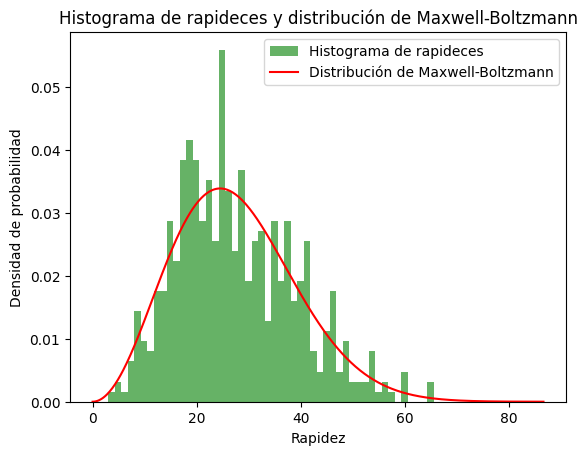

In [78]:
# Calcular la rapidez de cada partícula
rapideces = np.linalg.norm(velocidades, axis=1)

# Graficar el histograma de las rapideces
plt.hist(rapideces, bins=50, density=True, alpha=0.6, color='g',
          label='Histograma de rapideces')

# Graficar la distribución de Maxwell-Boltzmann
v = np.linspace(0, 5 * vmol_desviacion_estandar(T, Ma), N)
f_v = 4*np.pi*v** 2 * (Ma / (2*kB_C * np.pi * T))**1.5  * np.exp(-Ma*v** 2/(2*kB_C*T))
plt.plot(v, f_v, 'r-', label='Distribución de Maxwell-Boltzmann')

# Configurar la gráfica
plt.xlabel('Rapidez')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma de rapideces y distribución de Maxwell-Boltzmann')
plt.legend()

# Mostrar la gráfica
plt.show()

6. Definir un paso de tiempo para realizar la simulación del movimiento de las partículas así:

   - Calcular $L_{mol}$ en la caja.

   - El paso de tiempo será $dt = (L_{mol}/v_0)/f_t$ donde $f_t = 10$. Puede hacer más pequeño o más grande $f_t$ de dependiendo de si la simulación tarda mucho tiempo en ejecutarse.

Para calcular el lmol perimero debemos de cacular el Vmol y obtenemos su raiz cubica, sabiendo que este esta definido como el volumen total sobre el número de particulas

In [79]:
def Lmol_dt(V, N, rapideces, ft):
    """
    Calcula el tiempo de paso para la simulación.

    Parámetros:
    - V: Volumen del sistema.
    - N: Número de partículas en el sistema.
    - rapideces: Lista de las rapideces de las partículas.
    - ft: Factor de tiempo.

    Retorna:
    - Lmol: Longitud molecular.
    - dt: Tiempo de paso para la simulación.
    """
    # Calculamos Lmol
    Lmol = (V/N)**(1/3)
    # Calculamos el tiempo de paso para la simulación
    return Lmol, Lmol/np.mean(rapideces)/ft


In [80]:
def colision(r1, r2, v1, v2):
  """
  Calcula las velocidades de dos partículas idénticas después de una colisión elástica.
  
  Parámetros:
  r1, r2: vectores de posición iniciales (debe ser arrays de numpy).
  v1, v2: vectores de velocidad iniciales (debe ser arrays de numpy).
  
  Devuelve:
  v1f, v2f: nuevos vectores velocidad de las partículas.
  
  Adaptado de un código por Alejandro Murillo González.
  """
  r = r1 - r2
  n = r / np.linalg.norm(r)  # Vector unitario en la dirección de la colisión

  vrel = v1 - v2  # Velocidad relativa entre las partículas

  vn = (vrel @ n) * n  # Componente de la velocidad relativa en la dirección de la colisión
  v1f = v1 - vn  # Velocidad final de la partícula 1
  v2f = v2 + vn  # Velocidad final de la partícula 2
  
  return v1f, v2f


In [81]:
def calcular_particulas_vecinas(posiciones,  radio_corte):
    """
    Calcula las partículas vecinas para cada partícula en función de su posición y un radio de corte.

    Args:
        posiciones (list): Lista de posiciones de las partículas.
        radio_corte (float): Radio de corte para determinar si dos partículas son vecinas.

    Returns:
        list: Lista de listas que contiene las partículas vecinas para cada partícula.
    """
    # Crear una lista vacía para almacenar las partículas vecinas de cada partícula
    particulas_vecinas = [[] for _ in range(N)]
    
    # Iterar sobre todas las partículas
    for i in range(N):
        # Iterar sobre las partículas restantes
        for j in range(i + 1, N):
            # Calcular la distancia entre las partículas i y j
            distancia = np.linalg.norm(posiciones[i] - posiciones[j])
            
            # Si la distancia es menor o igual al radio de corte, las partículas son vecinas
            if distancia <= radio_corte:
                # Agregar la partícula j a la lista de partículas vecinas de la partícula i
                particulas_vecinas[i].append(j)
                
                # Agregar la partícula i a la lista de partículas vecinas de la partícula j
                particulas_vecinas[j].append(i)
    
    # Devolver la lista de partículas vecinas para cada partícula
    return particulas_vecinas

In [82]:
"""
Este código realiza una simulación de un gas ideal en un espacio tridimensional utilizando el método de modelado numérico.
"""

# Definiendo los parámetros de la simulación
ft = 50  # Factor de tiempo
L_mol, dt = Lmol_dt(V, N, rapideces, ft)  # Distancia molecular y tiempo de paso
f_d = .2  # Factor de distancia para colisión

# Calculemos radio de corte para las partículas vecinas
# Según la distancia que recorre la partícula más rápida en n pasos
r_vecinas = np.max(rapideces)*dt*27  # 27 pasos

# Configuración para la visualización con Matplotlib
fig = plt.figure()
ax = plt.axes(projection='3d')
camera = Camera(fig)

for t in range(500):  # Ejecutar la simulación para un número definido de pasos de tiempo
    # Actualizar la posición de las partículas según sus velocidades y el intervalo de tiempo
    posiciones += velocidades * dt

    # Verificar colisiones con las paredes del contenedor y actualizar las velocidades
    for i in range(N):  # Iterar sobre cada partícula
        for j in range(3):  # Iterar sobre cada dimensión (x, y, z)
            # Invertir la dirección de la velocidad si la partícula toca una pared
            if posiciones[i, j] < 0 or posiciones[i, j] > L:
                velocidades[i, j] *= -1
            # Asegurarse de que las partículas no salgan del contenedor
            posiciones[i, j] = np.clip(posiciones[i, j], 0, L)

    # Cada ciertos pasos, calcular qué partículas están lo suficientemente cerca como para colisionar
    if t == 0 or t % 23 == 0:
        particulas_vecinas = calcular_particulas_vecinas(posiciones, r_vecinas)
    
    # Calcular colisiones entre partículas vecinas y actualizar velocidades
    for i in range(N):  # Iterar sobre cada partícula
        for j in particulas_vecinas[i]:  # Iterar sobre partículas vecinas
            # Calcular la distancia entre partículas
            distancia = np.linalg.norm(posiciones[i] - posiciones[j])
            # Si las partículas están suficientemente cerca, se considera una colisión
            if distancia < f_d * L_mol:
                velocidades[i], velocidades[j] = colision(posiciones[i], posiciones[j], velocidades[i], velocidades[j])

    # Añadir las posiciones actuales al gráfico
    ax.scatter(posiciones[:, 0], posiciones[:, 1], posiciones[:, 2], color='b')  # Puntos en azul
    camera.snap()  # Capturar el estado actual para la animación

# Crear la animación
animation = camera.animate(25)
plt.title('Simulación de un Gas Ideal')
plt.close()
# Mostrar animación en formato HTML
try:
    HTML(animation.to_html5_video())
except:
    print('Puede ver la animación generada adjunta a esta tarea')

8. Para un momento dado calcule la presión que ejercen las partículas sobre cada una de las parede de la caja. Para ello sume los cambios en los momentos lineales que sufren las partículas al golpear y divida por el passo del tiempo que está usando en la simulación. Compare la presión calculada con la densidad de energía cinética.  También compare la presión obtenida con aquella que se espera a partir de la ecuación de estado de gas ideal.

Para la solución de este punto he decido cambiar los parámetros que se han manejado para hacer la simulación, ya que, para que la presión se ajuste al valor teorico de un gas ideal la cantidad de particulas debe de ser muy grande, sin embargo, para la simulación una gran cantidad de particulas tiene un alto costo computacional.

Definamos los nuevos parámetros:

In [83]:
# Cambiando el número de particulas
N = 1000000

# Generar posiciones aleatorias para las partículas
posiciones = generar_posiciones_particulas(N, L)

# Generar velocidades aleatorias para las partículas
velocidades = generar_velocidades_particulas(N, T, Ma)

ft = 50  # Factor de tiempo
L_mol, dt = Lmol_dt(V, N, rapideces, ft)  # Distancia molecular y tiempo de paso

In [84]:
# Definamos una función para calcular la presión
def presion_dt(posiciones, velocidades, L, dt):
    """
    Calcula la presión que ejercen las partículas sobre cada una de las paredes cada cara por separado.

    Parámetros:
    - posiciones: ndarray, un arreglo de forma (N, 3) que contiene las posiciones de las partículas.
    - velocidades: ndarray, un arreglo de forma (N, 3) que contiene las velocidades de las partículas.
    - L: float, longitud del lado de la caja cúbica en unidades termodinámicas.
    - dt: float, paso de tiempo en unidades termodinámicas.

    Retorna:
    - presion: float, presión que ejercen las partículas sobre cada una de las paredes de la caja.
    """
    # Chequear colisiones con las paredes
    presion = 0

    # Simulemos un paso de tiempo para la posicion de las particulas
    posiciones += velocidades * dt
    A = 6*L**2 # Area superficial de la caja
    for i in range(N):
        for j in range(3):
            if posiciones[i, j] < 0 or posiciones[i, j] > L:
                # Solo tenemos en cuenta el cambio en el momentumn de la componente que choca con la pared
                momentum = 2 * Ma * abs(velocidades[i, j]) 
                presion += momentum /  dt 

    return presion/A

def presion_ideal(T, V, N):
    """
    Calcula la presión de un gas ideal.

    Parámetros:
    - T: float, temperatura en unidades termodinámicas.
    - V: float, volumen del sistema
    - N: int, número de partículas en el sistema.

    Retorna:
    - presion: float, presión de un gas ideal.
    """
    return N * kB_C * T / V
# Calculemos la presión que ejercen las partículas sobre cada una de las paredes de la caja.
presion = presion_dt(posiciones, velocidades, L, dt)
presion_ideal_ = presion_ideal(T, V, N)

print(f"La presión ejerciuda por las particulas es : {abs(presion):.2f} [UC]")
print(f"La presión de un gas ideal con las mismas condiciones es: {presion_ideal_:.2f} [UC]")


La presión ejerciuda por las particulas es : 280456.84 [UC]
La presión de un gas ideal con las mismas condiciones es: 300000.00 [UC]


Si bien el valor no es exactamente igual esta en el mismo orden de magnitud y no muy alejado del valor real, para obtener mejores resultados el número de particulas debe de aumentar, sin embargo, hacer una simulación con una gran cantidad de particulas tiene un alto costo computacional

---
### Referencias

Para el desarrollo de algunas partes de este notebook, se utilizó ChatGPT, un modelo de lenguaje de OpenAI, como herramienta de asistencia. Las interacciones con ChatGPT ayudaron en la conceptualización, codificación y depuración de las secciones relevantes.